In [19]:
# Load convolve_im_freq from freq_1.ipynb

from IPython.display import clear_output
%run -n freq_1.ipynb 
clear_output(wait=False) 

import os
import numpy as np
import utils
import matplotlib.pyplot as plt 

In [20]:
def create_kernel(im):
    """
    Creates a filter kernel in the frequency domain.

    Args:
        im: np.array of shape [H, W]
    Returns:
        kernel: np.array of shape [H, W]
    """    
    kernel = np.ones_like((im))
    spike_height = 4  
    center_x = im.shape[1] // 2
    center_y = im.shape[0] // 2
    center_width = 28 

    kernel[center_y - spike_height // 2:center_y + spike_height // 2, :] = 0
    kernel[center_y - spike_height // 2:center_y + spike_height // 2,
           center_x - center_width:center_x + center_width] = 1

    kernel = np.fft.fftshift(kernel)


    return kernel

Saving image to: image_processed\moon_filtered.png


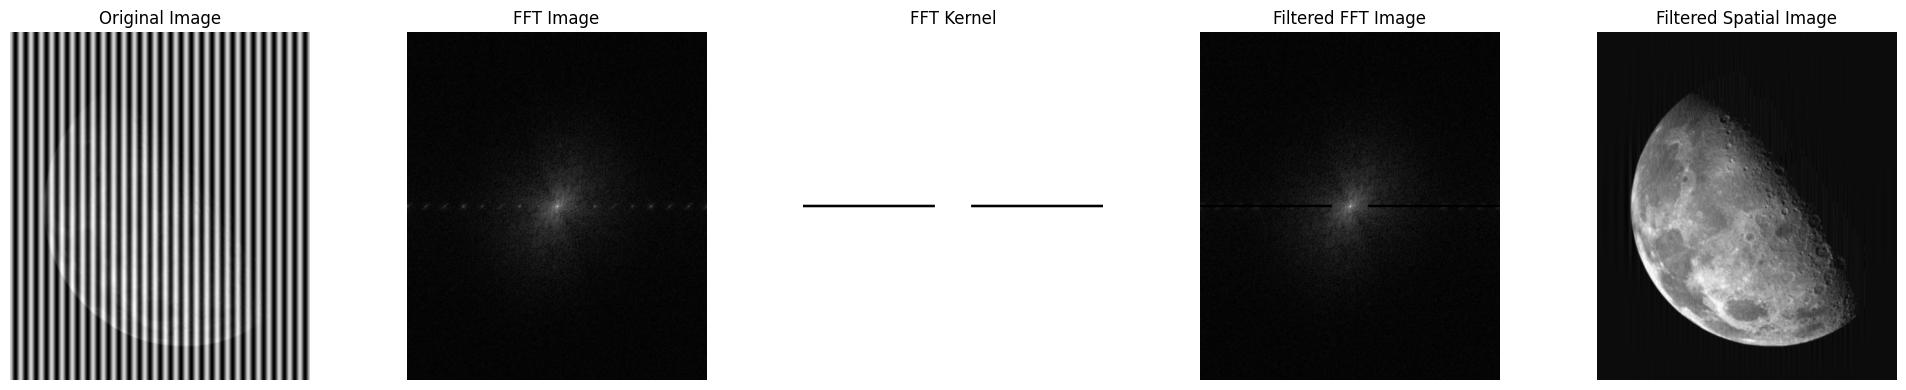

In [21]:
if __name__ == "__main__":
    # Changing this code should not be needed!
    
    impath = os.path.join("images", "noisy_moon.png")
    im = utils.read_im(impath)

    kernel = create_kernel(im)        
    # Note that this function is from your own implementation of convolve_im_freq from freq_1.ipynb
    im_filtered = convolve_im_freq(im, kernel, True) 
    
    utils.save_im("moon_filtered.png", utils.normalize(im_filtered))